### NOTE: Neither the lines of code nor text have been proofread and some of the writing have been taken directly from the OpenCV documentation

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We have looked at different methods of image segmentation, including: contours, moments, color spaces, backprojection, Fourier Transform, template matching, Hough Transform.

In this file, we consider two further methods: watershed and GrabCut.

### Watershed

This uses surface information to segment the image. The theory behind this is quite complicated; see:
<br>
https://docs.opencv.org/3.4/d3/db4/tutorial_py_watershed.html
<br>
https://en.wikipedia.org/wiki/Watershed_(image_processing)

OpenCV uses <code>cv.watershed()</code>.

For a coding example, see:
<br>
https://docs.opencv.org/3.4/d3/db4/tutorial_py_watershed.html


### GrabCut

This is the extraction of foreground from background. For an explanation of how it works:
<br>
https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html

OpenCV uses <code>cv.grabCut()</code>, which requires the following arguments:
<br>
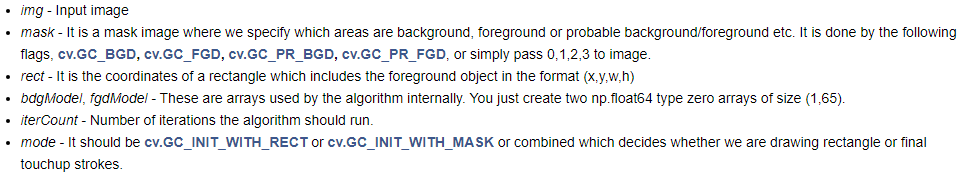

To demonstrate GrabCut, we shall return back to our basket image

(<matplotlib.image.AxesImage at 0x24331ebbdc8>, ([], []), ([], []))

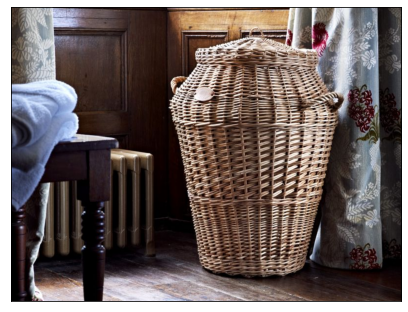

In [36]:
img = cv.imread('bank_images/test11.png')

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])

Let's see if we can extract the basket using GrabCut. First let us remind ourselves of the coordinates of where the basket is

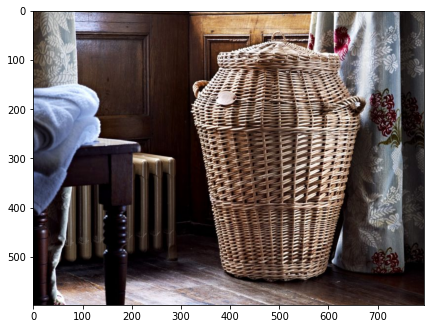

In [37]:
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_img)

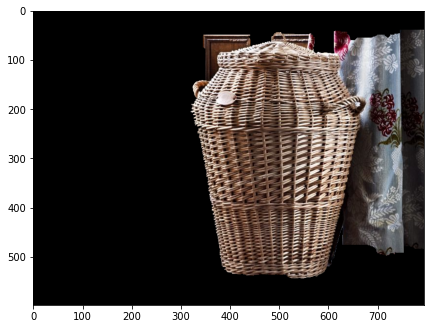

In [38]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (310,40,680,550)  # (x,y,w,h)

cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_img)

Some bits are missing (and some unwanted bits might have been included—the exact area of the grab can vary with each run). Let us see what the mask looks like.

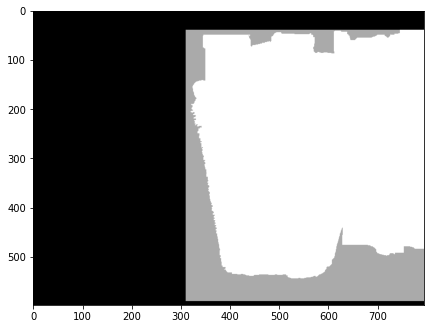

In [39]:
plt.figure(figsize=(7,6))
plt.imshow(mask, cmap='gray')

The black area is sure-background; the white area is (supposed) to be sure-foreground; and the gray area is, well, the gray area! We need to make some of the gray area, white (and some of the white area, black, if unwanted bits have been included). For that, I will use an image editor

First, save the mask!

In [40]:
cv.imwrite('bank_images/test11_mask.png', mask)

True

I will now open the saved mask with an image editor that has ruler function so that I can see the divisions on the two axes. Comparing this with the original image (which I will also open with the same image editor), I can trace out the additional sure-foreground and sure-background as accurately as possible. Once I'm done, I import the altered mask and try grabcut again

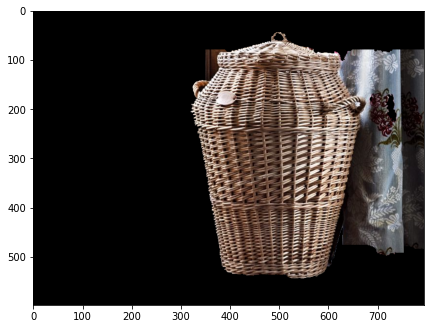

In [41]:
newmask = cv.imread('bank_images/test11_newmask.png', cv.IMREAD_GRAYSCALE)

# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]

rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_img)

There is some improvement but not as much as I would have liked. Let us see what the mask for the revised grabcut looks like

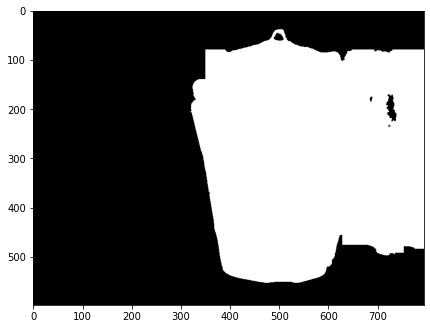

In [42]:
plt.figure(figsize=(7,6))
plt.imshow(mask, cmap='gray')

Again, the revised mask is better, but not as much as I would have liked. I suppose, I could use an image editor to 'black out' the unwanted areas (since not a lot of them are left compared to the original image), but the HSV properties of the editor's black may differ (significantly) to the background's black, resulting in something unsatisfactory. What all this says is that there is still more work to be done with the way computer vision does grabcut operations

https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html

In [1]:
l = [1,2,3,4]

In [2]:
import numpy as np

In [4]:
arr = np.array(l)

In [5]:
arr

array([1, 2, 3, 4])

In [ ]:
arr.